GOESFlareWatch4LED 

This controls the input to the Arduino for the version with 4 LEDs

Andre Csillaghy, raumschiff.org
August 2019

In [60]:
import serial
import time
from math import log,ceil
import sys
import numpy as np
import requests
from operator import itemgetter
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [59]:
plt.get_cmap('plasma')

NameError: name 'plt' is not defined

In [49]:
# This is the connection with the GOES service. 
# Uses the json file provided by NOAA
def ReadLastGOESValue():
    r = requests.get('https://services.swpc.noaa.gov/json/goes/primary/xrays-6-hour.json')
    data = r.json()
    data = [t['flux'] for t in data if t['energy']=='0.1-0.8nm']
    return data[-1], min(data), max(data)

In [50]:
# just testing...
val = ReadLastGOESValue()
print( val )

(4.546431142671281e-08, 2.6382268814018062e-08, 8.709270105100586e-08)


In [53]:
# Here we map the value read from GOES to an integer of a defined interval.
# The interval can correspond to an LED lamp, but it can also be a value to be
# mapped to an RGB value. 
# The interval default is 4. This way, any value from GOES will 
# map to a single LED
def GOES2IntValue( val, nb_LED=4, verbose=False, input_range=[1e-8,1e-7] ):
    return int(round( np.interp( val, input_range, [0,nb_LED-1])))

In [56]:
# just testing...
print( GOES2LEDValue( val[0], nb_LED=64, input_range=val[1:] ) )

20


In [45]:
a = [-12.32]*4
a

[-12.32, -12.32, -12.32, -12.32]

In [66]:
def InitGOES2Arduino( ):
    port = '/dev/ttyACM0'
    return serial.Serial(port, 9600)

def Send2Arduino( ser, level ):
    ser.write( str(level).encode() )
    #ser.write(  )
    
def CommWithArduino( diff=False, n_diff=5, fake=True, verbose=False ):

    if not fake: ser = InitGOES2Arduino()

    first_val = ReadLastGOESValue()
    diff = [first_val]*n_diff
    
    while True:
        
        current_goes_val = ReadLastGOESValue()
        if verbose: print("Current GOES value is", current_goes_val )
        
        if diff: 
            diff[0:-1] = diff[1:]      # shift array to make space to the new value
            diff[n_diff-1] = current_goes_val
            if verbose: print( "Diff array is: ", diff )
            level = GOES2LEDValue( current_goes_val,
                                   input_range = [min(diff), max(diff)])
        else: level = GOES2LEDValue( current_goes_val )
        
        if not fake : Send2Arduino( ser, level )

        print( "level: ", level, "sent")
        time.sleep(60)


In [ ]:
CommWithArduino( diff=True, fake=True, verbose=True )

Current GOES value is -7.216096420727265
Diff array is:  [-7.216096420727265, -7.216096420727265, -7.216096420727265, -7.216096420727265, -7.216096420727265]
level:  3 sent
Current GOES value is -7.216096420727265
Diff array is:  [-7.216096420727265, -7.216096420727265, -7.216096420727265, -7.216096420727265, -7.216096420727265]
level:  3 sent
Current GOES value is -7.206209615309181
Diff array is:  [-7.216096420727265, -7.216096420727265, -7.216096420727265, -7.216096420727265, -7.206209615309181]
level:  3 sent
Current GOES value is -7.214670164989232
Diff array is:  [-7.216096420727265, -7.216096420727265, -7.216096420727265, -7.206209615309181, -7.214670164989232]
level:  3 sent
Current GOES value is -7.213958789757445
Diff array is:  [-7.216096420727265, -7.216096420727265, -7.206209615309181, -7.214670164989232, -7.213958789757445]
level:  3 sent
Current GOES value is -7.213958789757445
Diff array is:  [-7.216096420727265, -7.206209615309181, -7.214670164989232, -7.21395878975744

In [89]:
round(3.99)


4

In [44]:
from collections import deque

dq = deque(['b','c','d'])
print dq

# adding an element to the right of the queue
dq.append('e')
print dq

# adding an element to the left of the queue
dq.appendleft('a')
print dq

# iterate over deque's elements
for elt in dq:
    print(elt)

# pop out an element at from the right of the queue
dq.pop()
print dq

# pop out an element at from the right of the queue
dq.popleft()
print dq

# print as list
print list(dq)

# reversed list
print list(reversed(dq))

# empty the deque element
dq.clear()


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(dq)? (<ipython-input-44-4f2c61646b74>, line 4)

In [5]:
sleep(3)

NameError: name 'sleep' is not defined

In [165]:
CommWithArduino( ser )

In [168]:
    scheduler = BackgroundScheduler()

In [ ]:
scheduler.shutdown()
ser.close()

In [183]:
ser.close()

Error submitting job "CommWithArduino (trigger: interval[0:01:00], next run at: 2018-01-06 11:08:49 CET)" to executor "default"
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.6/site-packages/apscheduler/schedulers/base.py", line 958, in _process_jobs
    executor.submit_job(job, run_times)
  File "/Applications/anaconda3/lib/python3.6/site-packages/apscheduler/executors/base.py", line 71, in submit_job
    self._do_submit_job(job, run_times)
  File "/Applications/anaconda3/lib/python3.6/site-packages/apscheduler/executors/pool.py", line 22, in _do_submit_job
    f = self._pool.submit(run_job, job, job._jobstore_alias, run_times, self._logger.name)
  File "/Applications/anaconda3/lib/python3.6/concurrent/futures/thread.py", line 117, in submit
    raise RuntimeError('cannot schedule new futures after shutdown')
RuntimeError: cannot schedule new futures after shutdown


In [61]:
ser.write( b'0')

1

In [102]:
level.to_bytes(1,'big')

b'\x00'

In [18]:
import numpy as np
import sunpy.data.sample
import sunpy.timeseries as ts

my_timeseries = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')
my_timeseries.peek()

Files Downloaded:   0%|          | 0/26 [00:00<?, ?file/s]




AIA20110607_063302_0211_lowres.fits:   0%|          | 0.00/988k [00:00<?, ?B/s]



AIA20110607_063302_0171_lowres.fits:   0%|          | 0.00/973k [00:00<?, ?B/s]


AIA20110607_063301_0131_lowres.fits:   0%|          | 0.00/962k [00:00<?, ?B/s]

HMI20110607_063211_los_lowres.fits:   0%|          | 0.00/8.40M [00:00<?, ?B/s]
aiacalibim5.fits.gz:   0%|          | 0.00/21.1M [00:00<?, ?B/s]
aiacalibim5.fits.gz:   0%|          | 11.9k/21.1M [00:00<03:23, 103kB/s]


AIA20110607_063301_0131_lowres.fits:   1%|          | 11.8k/962k [00:00<00:12, 73.5kB/s]

HMI20110607_063211_los_lowres.fits:   0%|          | 13.2k/8.40M [00:00<01:33, 89.7kB/s]




AIA20110607_063302_0211_lowres.fits:   2%|▏         | 14.9k/988k [00:00<00:14, 65.1kB/s]



AIA20110607_063302_0171_lowres.fits:   2%|▏         | 14.8k/973k [00:00<00:14, 68.1kB/s]


AIA20110607_063301_0131_lowres.fits:   2%|▏         | 16.3k/962k [00:00<00:18, 52.0kB/s]

HMI20110607_063

<Figure size 640x480 with 2 Axes>

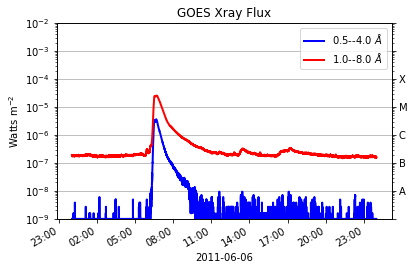

In [19]:
my_timeseries.peek()